In [1]:
import pandas as pd 
import numpy as np

In [2]:
tea = pd.read_csv(r'G:\可视化\茶文化数据源及文档/tea.csv')
comment = pd.read_csv(r'G:\可视化\茶文化数据源及文档/comment.csv')
display(tea.head(3))
display(comment.head(3))

,标题,评分,品牌,产地,茶类,详情链接,id,荐指数,总评,茶语排行,茶语分类排行,综合评分排行,热搜排行
0,[孝文家茶]牛肉（2015）,9.4,孝文家茶,福建,乌龙>其他,https://chaping.chayu.com/tea/2023,2023,4,一款火工细腻，霸气中又不失轻柔的大师级牛栏坑肉桂。\r\n正岩核心区域选料，由首批国家级武夷...,4,1,8,4
1,[华祥苑]宫廷清香安溪铁观音,9.4,华祥苑,福建,乌龙>安溪铁观音,https://chaping.chayu.com/tea/1002,1002,4,干茶：,4,1,432,8
2,[斗记茶业]金斗（2008）,9.3,斗记茶业,云南,普洱>生茶,https://chaping.chayu.com/tea/1298,1298,4,一款已经有明显转化的生普，时间已经带给这款茶明显不同于新茶的香气与滋味的表现。\r\n香气明...,13,4,119,15


,id,评论人,评论人等级,评分,评论内容,评论时间
0,1292,萧力争,专家,9.3,这款茶优点是原料级别高、芽叶肥壮显毫。***松紧合适，香气浓郁且带有良好的花香、滋味浓厚较爽...,2015-11-24
1,1292,木茗而来,达人,8.8,干茶芽头肥壮，带白毫，带有淡淡的果香。茶汤金黄透亮，滋味浓、爽滑鲜甜，香气带有花蜜香，滋味浓...,2015-11-17
2,1292,福的,NaN,9.4,斗记的这款金斗是一款有口皆碑好茶。几乎没有缺点。饮后心情愉悦且回味无穷。真是好茶自己会说话。,2018-10-11


In [3]:
display(tea.info())
display(comment.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4314 entries, 0 to 4313
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   标题      4314 non-null   object 
 1   评分      4314 non-null   float64
 2   品牌      4305 non-null   object 
 3   产地      4314 non-null   object 
 4   茶类      4314 non-null   object 
 5   详情链接    4314 non-null   object 
 6   id      4314 non-null   int64  
 7   荐指数     4314 non-null   int64  
 8   总评      4314 non-null   object 
 9   茶语排行    4314 non-null   int64  
 10  茶语分类排行  4314 non-null   int64  
 11  综合评分排行  4314 non-null   int64  
 12  热搜排行    4314 non-null   int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 438.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24889 entries, 0 to 24888
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      24889 non-null  int64  
 1   评论人     24889 non-null  object 
 2   评论人等级   4801 non-null   object 
 3   评分      24889 non-null  float64
 4   评论内容    24882 non-null  object 
 5   评论时间    24889 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.1+ MB


None

In [4]:
'''
标题由品牌与名称组成，值保留标题部分
'''
title = tea[['标题']]
def title_clean(s):
    try: # 剔除品牌
        s = s.split(']')[1]
    except:
        s = s.split(']')[0]
    finally: # 剔除数字
        s = s.split('（')[0]
    return s
title['标题'] = title['标题'].map(title_clean)
title.head()


C:\Users\Admin\AppData\Local\Temp\ipykernel_13064\2525783899.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  title['标题'] = title['标题'].map(title_clean)


,标题
0,牛肉
1,宫廷清香安溪铁观音
2,金斗
3,牛肉
4,茉莉银针


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Admin\AppData\Local\Temp\jieba.cache
Loading model cost 0.748 seconds.
Prefix dict has been built successfully.


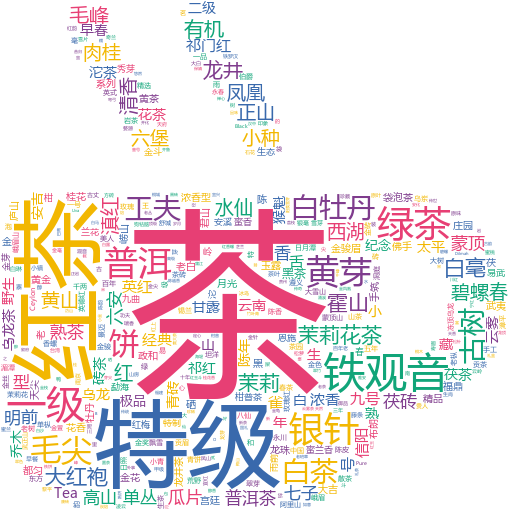

In [5]:
'''
词云图
'''
import jieba
txt = ''.join(list(title['标题']))
word = jieba.lcut(txt)
text = ' '.join(word)

from IPython.display import Image 
import stylecloud


stylecloud.gen_stylecloud(
    text=text,
    collocations=False,
    font_path=r'‪C:\Windows\Fonts\msyh.ttc',
    icon_name='fas fa-mug-hot',
    
    output_name='./标题词云图.png'
)
 
Image(filename='./标题词云图.png')

In [6]:
'''
评分取值 0-10
分区间 (0,2] (2,4] (4,6] (6,8] (8,10]
'''
score = tea[['评分']]
score = pd.cut(score['评分'],bins=[0,2,4,6,8,10]).reset_index()
score = score['评分'].value_counts().reset_index()
score = score.sort_values(by='index')
score['index'] = score['index'].map(lambda x: x)
score

,index,评分
4,"(0, 2]",1
3,"(2, 4]",2
2,"(4, 6]",40
1,"(6, 8]",1123
0,"(8, 10]",3148


In [7]:
'''
直方图
'''
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker
from pyecharts.globals import ThemeType

c = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.WONDERLAND))
    .add_xaxis(list(score['index']))
    .add_yaxis("数量", list(score['评分']), category_gap=0, color=Faker.rand_color())
    .set_global_opts(title_opts=opts.TitleOpts(title="评分分布"))
)

c.render('.评分分布.html')
c.render_notebook()

In [10]:
'''
计算各个品牌数
'''
brand = tea[['品牌']]
brand = brand['品牌'].value_counts().reset_index()
word = list(brand['index'])
counts = list(brand['品牌'])
data = list(zip(word,counts))
data[:5]

[('斗记茶业', 92), ('中茶', 66), ('大益', 61), ('祥源茶', 31), ('伯韵', 29)]

In [12]:
'''
词云图
'''
import pyecharts.options as opts
from pyecharts.charts import WordCloud


c = (
    WordCloud(init_opts=opts.InitOpts(theme=ThemeType.WONDERLAND))
    .add(series_name="品牌词云", data_pair=data, word_size_range=[6, 66])
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="品牌词云", title_textstyle_opts=opts.TextStyleOpts(font_size=23)
        ),
        tooltip_opts=opts.TooltipOpts(is_show=True),
    )
)
c.render('./品牌词云.html')
c.render_notebook()

In [13]:
'''
计算每个产地产了多少种茶 
'''
place = tea[['产地']]
place = place['产地'].value_counts().reset_index()
place

,index,产地
0,云南,1132
1,福建,944
2,安徽,329
3,四川,321
4,广东,228
5,湖南,221
6,浙江,205
7,广西,163
8,国外,151
9,台湾,99


In [15]:
'''
热力地图 
'''
from pyecharts import options as opts
from pyecharts.charts import Map
from pyecharts.faker import Faker

pieces = [
    {"min": 0, "max": 80},
    {"min": 80, "max": 160},
    {"min": 160, "max": 240},
    {"min": 240, "max": 320},
    {"min": 320, "max": 400},
    {"min": 400}
]

c = (
    Map(init_opts=opts.InitOpts(theme=ThemeType.WONDERLAND))
    .add("", [list(z) for z in zip(list(place['index']), list(place['产地']))], "china")
    .set_global_opts(
        title_opts=opts.TitleOpts(title="产地地区分布"),
        visualmap_opts=opts.VisualMapOpts(max_=400,
                                          is_piecewise=True,
                                         pieces=pieces),
    )
)
c.render('./产地地区分布.html')
c.render_notebook()

In [27]:
'''
茶类字段有分一级，二级，以 > 隔开
计算每个一级品种有多少二级品种
'''
kind = tea[['茶类']]
kind['一级'] = kind['茶类'].map(lambda x: x.split('>')[0])
kind = kind['一级'].value_counts().reset_index()
kind


C:\Users\Admin\AppData\Local\Temp\ipykernel_13064\3196092210.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kind['一级'] = kind['茶类'].map(lambda x: x.split('>')[0])


,index,一级
0,普洱,906
1,绿茶,836
2,红茶,778
3,乌龙,634
4,黑茶,329
5,白茶,284
6,花茶,210
7,黄茶,170
8,袋泡,141
9,速溶茶,26


In [19]:
'''
柱状图
'''
from pyecharts import options as opts
from pyecharts.charts import Bar


c = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.WONDERLAND))
    .add_xaxis(list(kind['index']))
    .add_yaxis("", list(kind['一级']))
    .set_global_opts(title_opts=opts.TitleOpts(title="茶类分布"))
)
c.render('./茶类分布.html')
c.render_notebook()

In [30]:
'''
清洗标题，并按热搜升序排序选出前20
'''
resou = tea[['标题','评分','品牌','产地','茶类','热搜排行']]
resou['标题'] = resou['标题'].map(title_clean)
resou = resou.sort_values(by='热搜排行')
resou = resou.iloc[:10,:]
resou

C:\Users\Admin\AppData\Local\Temp\ipykernel_13064\3042785555.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resou['标题'] = resou['标题'].map(title_clean)


,标题,评分,品牌,产地,茶类,热搜排行
2004,经典普洱,8.4,大益,云南,袋泡>熟茶,1
31,越乡龙井 特级,9.6,剡茗茶业社,浙江,绿茶,2
35,冻顶乌龙,9.4,王德传,台湾,乌龙>其他,3
0,牛肉,9.4,孝文家茶,福建,乌龙>其他,4
39,雨前特级南京雨花茶,9.4,强氏茗茶,江苏,绿茶>其他,5
34,白牡丹,9.4,二三两,福建,白茶>白牡丹,6
33,牛首,9.4,孝文家茶,福建,乌龙>其他,7
1,宫廷清香安溪铁观音,9.4,华祥苑,福建,乌龙>安溪铁观音,8
32,金色庄园系列·伍·祁红工夫,9.5,祥源茶,安徽,红茶>祁门红茶,9
51,1587臻茗,9.2,龙王山,浙江,绿茶>安吉白茶,10


In [32]:
'''
条形图 
'''
from pyecharts.components import Table
from pyecharts.options import ComponentTitleOpts


table = Table()

headers = ['标题','评分','品牌','产地','茶类','热搜排行']
rows = np.array(resou)
rows = rows.tolist()
table.add(headers, rows)
table.set_global_opts(
    title_opts=ComponentTitleOpts(title="热搜前10")
)
table.render("./热搜前20.html")
table.render_notebook()

标题,评分,品牌,产地,茶类,热搜排行
经典普洱,8.4,大益,云南,袋泡>熟茶,1
越乡龙井 特级,9.6,剡茗茶业社,浙江,绿茶,2
冻顶乌龙,9.4,王德传,台湾,乌龙>其他,3
牛肉,9.4,孝文家茶,福建,乌龙>其他,4
雨前特级南京雨花茶,9.4,强氏茗茶,江苏,绿茶>其他,5
白牡丹,9.4,二三两,福建,白茶>白牡丹,6
牛首,9.4,孝文家茶,福建,乌龙>其他,7
宫廷清香安溪铁观音,9.4,华祥苑,福建,乌龙>安溪铁观音,8
金色庄园系列·伍·祁红工夫,9.5,祥源茶,安徽,红茶>祁门红茶,9
1587臻茗,9.2,龙王山,浙江,绿茶>安吉白茶,10


In [35]:
'''
计算维度为年月，每一年每一月的评论数走势
比较每一年的走势
14-20年
'''
comm_time = comment[['评论时间']]
comm_time['year'] = comm_time['评论时间'].map(lambda x: x.split('-')[0])
comm_time['month'] = comm_time['评论时间'].map(lambda x: x.split('-')[1])

_14 = comm_time[comm_time['year'] == '2014']['month'].value_counts().reset_index()
_14 = _14.sort_values(by='index')

_15 = comm_time[comm_time['year'] == '2015']['month'].value_counts().reset_index()
_15 = _15.sort_values(by='index')

_16 = comm_time[comm_time['year'] == '2016']['month'].value_counts().reset_index()
_16 = _16.sort_values(by='index')

_17 = comm_time[comm_time['year'] == '2017']['month'].value_counts().reset_index()
_17 = _17.sort_values(by='index')

_18 = comm_time[comm_time['year'] == '2018']['month'].value_counts().reset_index()
_18 = _18.sort_values(by='index')

_19 = comm_time[comm_time['year'] == '2019']['month'].value_counts().reset_index()
_19 = _19.sort_values(by='index')

_20 = comm_time[comm_time['year'] == '2020']['month'].value_counts().reset_index()
_20 = _20.sort_values(by='index')

C:\Users\Admin\AppData\Local\Temp\ipykernel_13064\3266321423.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comm_time['year'] = comm_time['评论时间'].map(lambda x: x.split('-')[0])
C:\Users\Admin\AppData\Local\Temp\ipykernel_13064\3266321423.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comm_time['month'] = comm_time['评论时间'].map(lambda x: x.split('-')[1])


In [36]:
'''
折线图
'''
import pyecharts.options as opts
from pyecharts.charts import Line 

x_data = ['1','2','3','4','5','6','7','8','9','10','11','12']


c = (
    Line()
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(
        series_name="2014",
        #stack="总量",
        y_axis=list(_14['month']),
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis(
        series_name="2015",
        #stack="总量",
        y_axis=list(_15['month']),
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis(
        series_name="2016",
        #stack="总量",
        y_axis=list(_16['month']),
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis(
        series_name="2017",
        #stack="总量",
        y_axis=list(_17['month']),
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis(
        series_name="2018",
        #stack="总量",
        y_axis=list(_18['month']),
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis(
        series_name="2019",
        #stack="总量",
        y_axis=list(_19['month']),
        label_opts=opts.LabelOpts(is_show=False),
    )
    .add_yaxis(
        series_name="2020",
        #stack="总量",
        y_axis=list(_20['month']),
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="评论走势"),
        tooltip_opts=opts.TooltipOpts(trigger="axis"),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            axistick_opts=opts.AxisTickOpts(is_show=True),
            splitline_opts=opts.SplitLineOpts(is_show=True),
        ),
        xaxis_opts=opts.AxisOpts(type_="category", boundary_gap=False),
    )
)
c.render('./每一年评论走势.html')
c.render_notebook()

In [37]:
'''
总评聚类，把相似的聚在一起
使用 textRank 算法提取每种茶总评的关键词
文本向量化，计算余弦相似度 
最后进行聚类
对每个聚类结果绘制词云
'''
zongping = tea[['总评']]


# textRank 算法
from jieba import analyse

def textrank_extract(text, keyword_num=10):
    textrank = analyse.textrank
    keywords = textrank(text, keyword_num)
    # 输出抽取出的关键词
    kw = ''
    for keyword in keywords:
        kw += keyword + ' '
    return kw

zongping['keyword'] = zongping['总评'].map(textrank_extract)
zongping.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13064\2089999508.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zongping['keyword'] = zongping['总评'].map(textrank_extract)


,总评,keyword
0,一款火工细腻，霸气中又不失轻柔的大师级牛栏坑肉桂。\r\n正岩核心区域选料，由首批国家级武夷...,肉桂 入口 带来 山场 遗传 焙火 茶汤 霸气 全部 桂皮
1,干茶：,
2,一款已经有明显转化的生普，时间已经带给这款茶明显不同于新茶的香气与滋味的表现。\r\n香气明...,滋味 香气 新茶 生普 时间 生动 为主 留香 极具 变化
3,一款内质丰厚、完美呈现的顶级山场肉桂\r\n精湛的工艺和顶级的选料，激发出武夷岩茶最深层次的...,香气 茶汤 乐曲 停止 顶级 花果 变化 满足 统一 激发
4,苛刻的选料和精湛的工艺让一款茉莉花茶得到了升华。\r\n清雅甜果香、清幽花香与茶本身的嫩香，...,工艺 遇见 带来 茶汤 茉莉花 绽放 相融 交织 茉莉花茶 得到


In [38]:
# 文本向量化，计算余弦相似度
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vect = CountVectorizer()
X = vect.fit_transform(list(zongping['keyword']))  # 将关键词的内容文本向量化
X = X.toarray()

words_bag2 = vect.get_feature_names()  
df = pd.DataFrame(X, columns=words_bag2)
cosine_similarities  = cosine_similarity(df)

cosine_similarities

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array([[1. , 0. , 0. , ..., 0.1, 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 1. , ..., 0.1, 0. , 0. ],
       ...,
       [0.1, 0. , 0.1, ..., 1. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ]])

In [39]:
# 聚类
from sklearn.cluster import KMeans
kms = KMeans(n_clusters=2, random_state=123)
k_data = kms.fit_predict(cosine_similarities)
zongping['flag'] = k_data
zongping.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13064\27315579.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zongping['flag'] = k_data


,总评,keyword,flag
0,一款火工细腻，霸气中又不失轻柔的大师级牛栏坑肉桂。\r\n正岩核心区域选料，由首批国家级武夷...,肉桂 入口 带来 山场 遗传 焙火 茶汤 霸气 全部 桂皮,1
1,干茶：,,1
2,一款已经有明显转化的生普，时间已经带给这款茶明显不同于新茶的香气与滋味的表现。\r\n香气明...,滋味 香气 新茶 生普 时间 生动 为主 留香 极具 变化,0
3,一款内质丰厚、完美呈现的顶级山场肉桂\r\n精湛的工艺和顶级的选料，激发出武夷岩茶最深层次的...,香气 茶汤 乐曲 停止 顶级 花果 变化 满足 统一 激发,0
4,苛刻的选料和精湛的工艺让一款茉莉花茶得到了升华。\r\n清雅甜果香、清幽花香与茶本身的嫩香，...,工艺 遇见 带来 茶汤 茉莉花 绽放 相融 交织 茉莉花茶 得到,1


In [41]:
# 绘制词云
from pyecharts.globals import SymbolType
from collections import Counter
pd.set_option('display.max_rows',None)

for i in range(2):
    t = '种类' + str(i+1)
    data = list(zongping[zongping['flag'] == i]['keyword'])
    data = list(dict(Counter(' '.join(data).split())).items())
    data = sorted(data,key=lambda x: x[1],reverse=True)[:250]
    c = (
        WordCloud(init_opts=opts.InitOpts(theme=ThemeType.ROMANTIC))
        .add(series_name=t, data_pair=data,
             word_size_range=[6, 66],shape=SymbolType.DIAMOND)
        .set_global_opts(
            title_opts=opts.TitleOpts(
                title=t, title_textstyle_opts=opts.TextStyleOpts(font_size=23)
            ),
            tooltip_opts=opts.TooltipOpts(is_show=True),
        )
    )
    display(c.render_notebook())

In [44]:
'''
分词，词性标注，去除停用词
'''
comm = comment[['评论内容']]

import jieba
import jieba.posseg as psg

# 把每条评论分词，并标注每个词的词性
worker = lambda s: [(x.word,x.flag) for x in psg.cut(str(s))] # 自定义简单分词函数
seg_word = comm['评论内容'].apply(worker)
seg_word.head()

0    [(这, r), (款, n), (茶, n), (优点, n), (是, v), (原料,...
1    [(干茶芽, nr), (头, n), (肥壮, a), (，, x), (带白, v), ...
2    [(斗记, n), (的, uj), (这款, r), (金斗, nr), (是, v), ...
3    [(茶汤, n), (为, p), (非常, d), (漂亮, a), (的, uj), (...
4    [(汤水, nr), (中, f), (的, uj), (蜜香, n), (同样, d), ...
Name: 评论内容, dtype: object

In [50]:
# 提取名词，形容词，删除停用词
stop_word_path = r'G:\可视化\茶文化数据源及文档\stopword.txt'
stopword_list = [sw.replace('\n', '') for sw in open(stop_word_path,encoding='utf-8').readlines()]
comm = list(seg_word.values)
new_comm = []
for cm in comm:
    t = ''
    for c in cm:
        if (c[1] == 'n' or c[1] == 'adj') and (c[0] not in stopword_list):
            t += c[0] + ' '
    new_comm.append(t.strip())
new_comm[:5]

['款 茶 优点 原料 级别 芽叶 香气 滋味 缺点 叶 总体 款 品质 普洱茶',
 '头 果香 茶汤 滋味 香气 花蜜 滋味 化 茶质',
 '斗记 茶 缺点 心情 茶',
 '茶汤 金黄色 亮度高',
 '蜜香 化 消失']